In [3]:
import os
#os.curdir()
import numpy as np
import pandas as pd
import statistics as ss


7

## Question 1

In [41]:
import scipy.stats as stats

# Given parameters
mu = 120  # Mean duration (minutes)
sigma = 15  # Standard deviation (minutes)

# 1. Probability that duration is between 115 and 125 minutes
prob_between_115_and_125 = stats.norm.cdf(125, mu, sigma) - stats.norm.cdf(115, mu, sigma)
print(f"1. Probability between 115 and 125 minutes: {prob_between_115_and_125:.4f}")

# 2. Probability that duration is greater than 130 minutes
prob_greater_than_130 = 1 - stats.norm.cdf(130, mu, sigma)
print(f"2. Probability greater than 130 minutes: {prob_greater_than_130:.4f}")

# 3. Probability that duration is within 0.75 standard deviations of the mean
prob_within_0_75_sd_of_mean = stats.norm.cdf(mu + 0.75 * sigma, mu, sigma) - stats.norm.cdf(mu - 0.75 * sigma, mu, sigma)
print(f"3. Probability within 0.75 SD of the mean: {prob_within_0_75_sd_of_mean:.4f}")

# 4. Probability of an exact duration (e.g., 110 minutes) is zero for a continuous distribution

# 5. Durations corresponding to the bottom 10% and 5%
duration_10_percentile = stats.norm.ppf(0.10, mu, sigma)
duration_5_percentile = stats.norm.ppf(0.05, mu, sigma)
print(f"5. Duration corresponding to bottom 10%: {duration_10_percentile:.2f} minutes")
print(f"   Duration corresponding to bottom 5%: {duration_5_percentile:.2f} minutes")

# 6. Z-score for a movie with duration 140 minutes
duration = 140
z_score = (duration - mu) / sigma
print(f"6. Z-score for duration 140 minutes: {z_score:.4f}")


1. Probability between 115 and 125 minutes: 0.2611
2. Probability greater than 130 minutes: 0.2525
3. Probability within 0.75 SD of the mean: 0.5467
5. Duration corresponding to bottom 10%: 100.78 minutes
   Duration corresponding to bottom 5%: 95.33 minutes
6. Z-score for duration 140 minutes: 1.3333


### Expon

Suppose we’re dealing with the number of emails received per hour, and the average number of emails is 8.
1.7 Probability that the next email will arrive exactly 2 minutes from now:

1.8 Probability that the next email will arrive without waiting for the next 5 minutes:

1.9 Probability that no emails arrive for at least 3 minutes

1.10 Probability that emails arrive between 1 and 4 minutes from now

1.11 Probability that no emails arrive for at least 3 minutes (when the average number of emails received is 12 per hour):

In [14]:
from scipy.stats import expon

# Parameters
average_rate_1 = 8  # emails per hour
average_rate_2 = 12  # emails per hour

# 1.7 Probability that the next email will arrive exactly 2 minutes from now
rate_1 = average_rate_1 / 60  # convert to emails per minute
prob_1_7 = expon.pdf(2, scale=1/rate_1)
print("1.7 Probability:", prob_1_7)

# 1.8 Probability that the next email will arrive without waiting for the next 5 minutes
prob_1_8 = expon.cdf(5, scale=1/rate_1)
print("1.8 Probability:", prob_1_8)

# 1.9 Probability that no emails arrive for at least 3 minutes
prob_1_9 = 1 - expon.cdf(3, scale=1/rate_1)
print("1.9 Probability:", prob_1_9)

# 1.10 Probability that emails arrive between 1 and 4 minutes from now
prob_between_1_and_4 = expon.cdf(4, scale=1/rate_1) - expon.cdf(1, scale=1/rate_1)
print("1.10 Probability:", prob_between_1_and_4)

# 1.11 Probability that no emails arrive for at least 3 minutes (when the average number of emails received is 12 per hour)
rate_2 = average_rate_2 / 60  # convert to emails per minute
prob_1_11 = 1 - expon.cdf(3, scale=1/rate_2)
print("1.11 Probability:", prob_1_11)


1.7 Probability: 0.10212377844861982
1.8 Probability: 0.486582880967408
1.9 Probability: 0.6703200460356393
1.10 Probability: 0.28852709953291567
1.11 Probability: 0.5488116360940265


# Question 2

In [33]:
# read movid data
df = pd.read_csv('movies_data.csv')
df.head()

,Unnamed: 0,duration,gross_adjusted,budget_adjusted,gross,budget,cast_facebook_likes,reviews,Metascore,imdbRating,imdbVotes,OscarWon,OtherWin,OscarNom,OtherNom,oldness
0,1,83,14142117,42555556,11631245.0,35000000.0,5022,176,26,4.3,16367,0,4,0,8,13
1,2,102,29451448,51065177,28837115.0,50000000.0,24107,376,34,4.7,53943,0,7,0,17,3
2,3,102,87570655,87177413,80360866.0,80000000.0,5392,305,30,5.2,49098,0,1,0,2,8
3,4,88,86365946,26964263,75590286.0,23600000.0,28011,998,73,7.7,426786,0,9,0,28,10
4,5,162,39077724,76858659,33048353.0,65000000.0,36928,966,78,7.7,353948,0,2,0,67,12


In [35]:
# Define the function to categorize gross earnings
def categorize_gross(OscarWon):
    if OscarWon == 0:
        return '0'
    elif 1 <= OscarWon <= 3:
        return '1-3'
    elif 4 <= OscarWon <= 5:
        return '4-5'
    else:
        return 'High'

# Apply the function to create a new column 'gross_category'
df['oscar_category'] = df['OscarWon'].apply(categorize_gross)
df

,Unnamed: 0,duration,gross_adjusted,budget_adjusted,gross,budget,cast_facebook_likes,reviews,Metascore,imdbRating,imdbVotes,OscarWon,OtherWin,OscarNom,OtherNom,oldness,oscar_category
0,1,83,14142117,42555556,11631245.0,35000000.0,5022,176,26,4.3,16367,0,4,0,8,13,0
1,2,102,29451448,51065177,28837115.0,50000000.0,24107,376,34,4.7,53943,0,7,0,17,3,0
2,3,102,87570655,87177413,80360866.0,80000000.0,5392,305,30,5.2,49098,0,1,0,2,8,0
3,4,88,86365946,26964263,75590286.0,23600000.0,28011,998,73,7.7,426786,0,9,0,28,10,0
4,5,162,39077724,76858659,33048353.0,65000000.0,36928,966,78,7.7,353948,0,2,0,67,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,2576,108,13976785,25136177,12232937.0,22000000.0,2799,226,38,5.6,24541,0,0,0,0,10,0
2576,2577,107,65026,9726984,53481.0,8000000.0,2512,60,36,6.4,5756,0,0,0,0,13,0
2577,2578,100,95288705,120994193,66941559.0,85000000.0,4182,161,35,4.9,29279,0,0,1,6,19,0
2578,2579,97,56168833,23540936,38176108.0,16000000.0,37907,682,70,7.2,249909,0,2,0,12,20,0


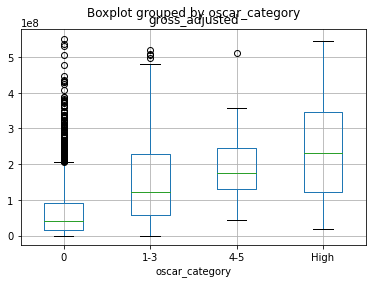

In [36]:
df.boxplot(column='gross_adjusted', by='oscar_category');

In [37]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the ANOVA model
model = ols('gross_adjusted ~ C(oscar_category)', data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model)
print(anova_table)


                       df        sum_sq       mean_sq          F        PR(>F)
C(oscar_category)     3.0  1.968431e+18  6.561437e+17  99.375173  7.241346e-61
Residual           2576.0  1.700854e+19  6.602693e+15        NaN           NaN


In [38]:
from statsmodels.stats.multicomp import MultiComparison

# Perform Tukey's HSD post hoc test
tukey_test = MultiComparison(data=df['gross_adjusted'], groups=df['oscar_category'])
tukey_result = tukey_test.tukeyhsd(alpha=0.05)
print("\nTUKEY")
print("*"*5)
print(tukey_result)

# Perform Bonferroni post hoc test
bonferroni_result = tukey_test.allpairtest(sm.stats.ttest_ind, method='bonferroni', alpha=0.05)[0]
print("\nBONFERRONI")
print("*"*10)
print(bonferroni_result)



TUKEY
*****
          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
group1 group2    meandiff    p-adj      lower          upper      reject
------------------------------------------------------------------------
     0    1-3  93567123.8979  0.001    75874277.03 111259970.7657   True
     0    4-5 130134468.6658  0.001  86369760.2735 173899177.0581   True
     0   High 181025947.4852  0.001 122933891.5647 239118003.4057   True
   1-3    4-5  36567344.7679 0.1852 -10251070.4837  83385760.0196  False
   1-3   High  87458823.5873 0.0012   27032825.316 147884821.8586   True
   4-5   High  50891478.8194 0.2713 -21590340.5387 123373298.1775  False
------------------------------------------------------------------------

BONFERRONI
**********
Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonferroni
alphacSidak=0.01, alphacBonf=0.008
group1 group2   stat    pval  pval_corr reject
----------------------------------------------
     0    1-3 -13.7351    0.0       0.0  

# Question 4

In [40]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Step 1: Create a DataFrame
data = {
    'group': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
    'score': [10, 12, 15, 8, 11, 13, 6, 9, 12]
}

df = pd.DataFrame(data)

# Step 2: Perform ANOVA
model = ols('score ~ group', data=df).fit()
anova_table = sm.stats.anova_lm(model)
print(anova_table)

# Step 3: Post Hoc Tests (if needed)
# Perform Tukey's HSD test
from statsmodels.stats.multicomp import MultiComparison

tukey_test = MultiComparison(data=df['score'], groups=df['group'])
tukey_result = tukey_test.tukeyhsd(alpha=0.05)
print(tukey_result)

# Perform Bonferroni correction
bonferroni_result = tukey_test.allpairtest(sm.stats.ttest_ind, method='bonferroni', alpha=0.05)[0]
print(bonferroni_result)


           df     sum_sq   mean_sq         F    PR(>F)
group     2.0  16.666667  8.333333  1.153846  0.376715
Residual  6.0  43.333333  7.222222       NaN       NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B  -1.6667 0.7281  -8.3914 5.0581  False
     A      C  -3.3333 0.3477 -10.0581 3.3914  False
     B      C  -1.6667 0.7281  -8.3914 5.0581  False
----------------------------------------------------
Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonferroni
alphacSidak=0.02, alphacBonf=0.017
group1 group2  stat   pval  pval_corr reject
--------------------------------------------
     A      B 0.8111 0.4628       1.0  False
     A      C 1.4744 0.2144    0.6432  False
     B      C 0.7372 0.5019       1.0  False
--------------------------------------------
